In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style

pd.options.display.max_rows = 29
pd.options.display.max_columns = 29
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
style.use('bmh')
%matplotlib inline

# importing data

In [ ]:
mnist = fetch_mldata('MNIST original')
observations = mnist.data
labels = mnist.target

# shuffling instances using permutation 

In [2]:
shuffle_index = np.random.permutation(70000)
observations = observations[shuffle_index]
labels = labels[shuffle_index]

# splitting training and testing data 

In [3]:
X_train, y_train = observations[:6000], labels[:6000]
X_test, y_test = observations[6000:], labels[6000:]
y_train_7 = y_train == 7

# importing different models

In [30]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# creating object to the models

In [31]:
sgd_clf = SGDClassifier(loss= 'modified_huber',random_state=42,  max_iter=5)
rf_clf = RandomForestClassifier(random_state=42)
gnb_clf = GaussianNB()

# training the models

In [ ]:
sgd_clf.fit(X_train, y_train_7)
rf_clf.fit(X_train, y_train_7)
gnb_clf.fit(X_train, y_train_7)

# which returns a score for each instance

In [33]:
y_score1 = sgd_clf.decision_function(X_train)
y_score2 = rf_clf.predict_proba(X_train)
y_score3 = gnb_clf.predict_proba(X_train)

# drawing roc curve for each model

In [34]:
from sklearn.metrics import roc_curve
fpr1,tpr1,th1 = roc_curve(y_train_7, y_score1)
fpr2,tpr2,th2 = roc_curve(y_train_7, y_score2[:,1])
fpr3,tpr3,th3 = roc_curve(y_train_7, y_score3[:,1])

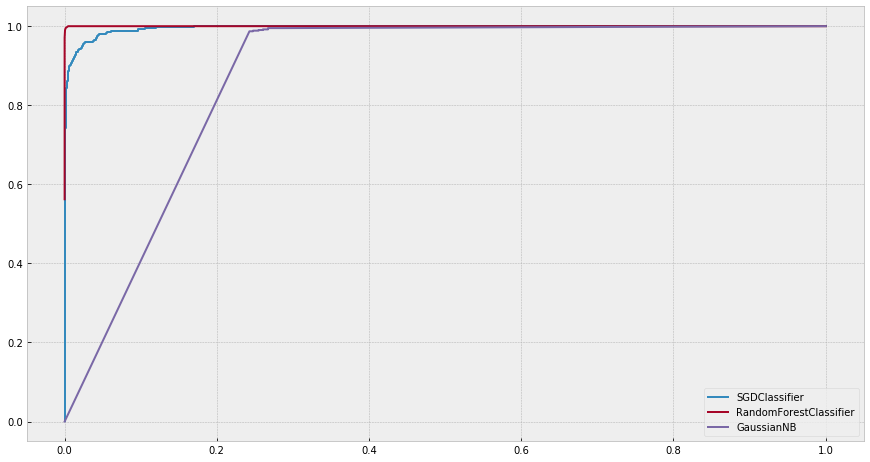

In [35]:
x = plt.figure(figsize=(15, 8))
x = plt.plot(fpr1,tpr1, label= 'SGDClassifier')
x = plt.plot(fpr2,tpr2, label= 'RandomForestClassifier')
x = plt.plot(fpr3,tpr3, label= 'GaussianNB')
x = plt.legend(loc='lower right')

In [36]:
# Compute Area Under the Receiver Operating Characteristic Curve

from sklearn.metrics import roc_auc_score
'SGDClassifier roc_auc_score         : {}'.format(roc_auc_score(y_train_7,y_score1))
'RandomForestClassifier roc_auc_score: {}'.format(roc_auc_score(y_train_7,y_score2[:,1]))
'GaussianNB roc_auc_score            : {}'.format(roc_auc_score(y_train_7,y_score3[:,1]))

'SGDClassifier roc_auc_score         : 0.9957178957013534'

'RandomForestClassifier roc_auc_score: 0.999975681802693'

'GaussianNB roc_auc_score            : 0.8749086941758518'

#### conclusion

# using cross_val_predict

In [37]:
# cross_val_predict
from sklearn.model_selection import cross_val_predict
y_score1 = cross_val_predict(sgd_clf, X_train, y_train_7, cv=3, method='decision_function')
y_score2 = cross_val_predict(rf_clf, X_train, y_train_7, cv=3, method='predict_proba')
y_score3 = cross_val_predict(gnb_clf , X_train, y_train_7, cv=3, method='predict_proba')

# plotting roc curves

In [38]:
fpr1,tpr1,th1 = roc_curve(y_train_7, y_score1)
fpr2,tpr2,th2 = roc_curve(y_train_7, y_score2[:,1])
fpr3,tpr3,th3 = roc_curve(y_train_7, y_score3[:,1])

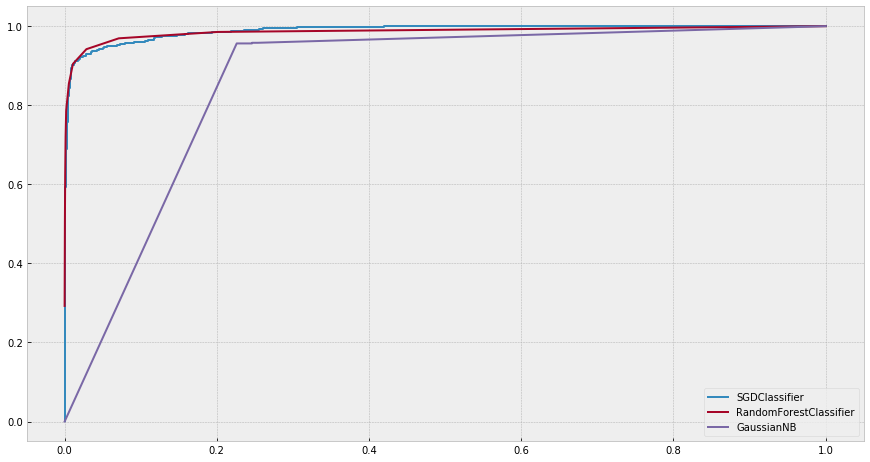

In [39]:
x = plt.figure(figsize=(15, 8))
x = plt.plot(fpr1,tpr1, label= 'SGDClassifier')
x = plt.plot(fpr2,tpr2, label= 'RandomForestClassifier')
x = plt.plot(fpr3,tpr3, label= 'GaussianNB')
x = plt.legend(loc='lower right')

In [29]:
# roc_auc_score
'SGDClassifier roc_auc_score         : {}'.format(roc_auc_score(y_train_7,y_score1))
'RandomForestClassifier roc_auc_score: {}'.format(roc_auc_score(y_train_7,y_score2[:,1]))
'GaussianNB roc_auc_score            : {}'.format(roc_auc_score(y_train_7,y_score3[:,1]))

'SGDClassifier roc_auc_score         : 0.9888184328332892'

'RandomForestClassifier roc_auc_score: 0.9859706518387709'

'GaussianNB roc_auc_score            : 0.8651186682994885'

#### conclusion:

In [ ]:
# 1) good job separating the classes will have an ROC curve that hugs the upper left corner of the plot.
# 2)SGDClassifier is good

# Exercise: Summarise the steps to train a binary classifier

In [ ]:
# 1) import MNIST dataset 
# 2) shuffle instances using random.permutation 
# 3) split training and testing data
# 4) convert training target into binary categorical (eg: 'true'if(target == 7) else 'false')
# 5) import requried models
# 6) train the model with features and converted target
# 7) evaluate the performance of a classifier using
#     a) Confusion Matrix (confusion_matrix, precision_score, recall_score, f1_score)
#     b) Precision/Recall Tradeoff(precision_recall_curve)
#     c) The ROC Curve(roc_auc_score, roc_curve)